### 大数の法則
正しいコインを10回投げることを考える(ベルヌーイ試行)。
$i$回目のコインを投げて表が出た場合1、裏が出た場合0をとる確率変数$x_i$を考える。
10回の試行で表の出た回数は、
$$
r=x_1+\cdots+x_{10}
$$
である。
表が出た回数の割合$\hat{p}=r/10$は観測された成功率である。
一般に、$n$をコイン投げの回数とするとき、$r/n$は相対頻度である。
$r$は確率変数で、$n=10,p=0.5$の二項分布$Bi(10,0.5)$、すなわち、
$$
f_{10}(x)=_{10}C_x(1/2)^{10},\hspace{3mm}x=0,1,\cdots,10
$$
に従い、その期待値、分散は
$$
E(r)=np=5,\hspace{5mm}V(r)=np(1-p)=2.5
$$
だから、割合$r/n$の期待値、分散は
$$
E(r/n)=p=0.5,\hspace{5mm}V(r/n)=p(1-p)/n=0.025
$$
である。
ここで、$p=0.5$は真の成功率となっている。
一般に$\varepsilon$がどのように小さい値であっても
$$
P(|r/n-0.5|\leq\varepsilon)→1\hspace{3mm}(n→\infty)
$$
が知られている。

成功の確率が$p=0.4$であるようなベルヌーイ試行でシミュレーションを行う。


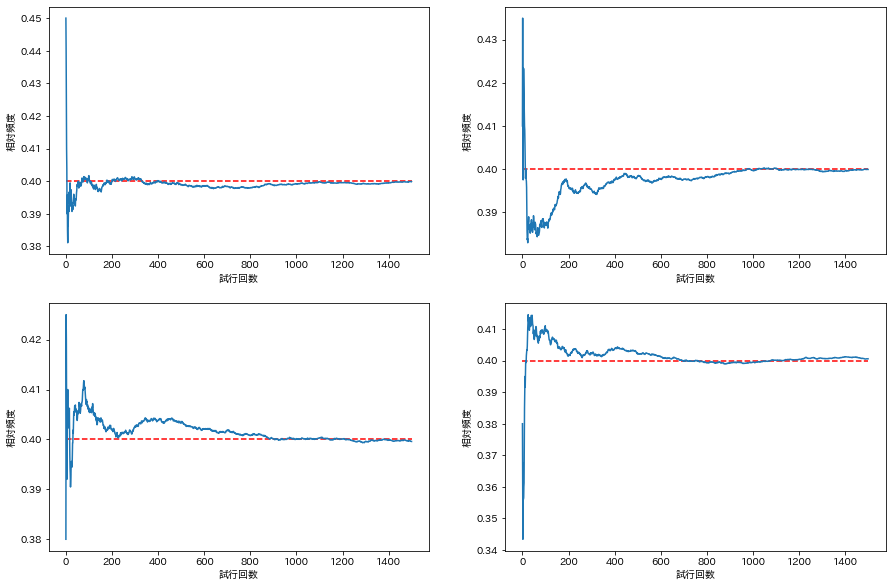

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

n= 100

fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in np.arange(4):
    sample = np.array([])
    d = []
    for m in np.arange(1500):
        sample = np.concatenate([sample, stats.bernoulli.rvs(p=0.4, size=n)])
        d.append(np.mean(sample))
    ax[i//2][i%2].plot(d)
    ax[i//2][i%2].hlines(0.4,0,1500,linestyle='--',color='red')
    ax[i//2][i%2].set_xlabel('試行回数')
    ax[i//2][i%2].set_ylabel('相対頻度')

同じ実験を4回行った。試行回数$n$が増えるにつれて、真の成功率$p=0.4$に近づく様子が見られる。
大数の法則の意味は、試行回数$n$が大きくなれば観測された成功率は真の成功率の近傍にある確率が極めて高くなるということであり、そきどき起こる特定の場合には、そうなっていないこともあるということである。

$n$が大きいほど$\bar{X}$はもとの比率$p$の近くに分布するから、この原理を逆に利用して、全体母集団での比率$p$を部分の$\bar{X}$からある程度正確に見積もることができる。
大数の法則は、一般的に大標本では、観察された標本平均を母集団の真の平均(母平均)とみなしてよいという常識を、数学的に厳密に証明したものに他ならない。
### 中心極限定理
大数の法則は、統計学的に応用されるものとしては、標本の大きさ$n$が十分大ならば、標本平均$\bar{X}=(X_1+\cdots+X_n)/n$の確率分布は母集団確率分布の平均$\mu$の近くに集中していることを保証している。
中心極限定理は、大数の法則より詳しい大定理であり、母集団分布が何であっても、和$X_1+\cdots+X_n$の確率分布の形は、$n$が大なるときには大略正規分布と考えてよいということである。
母集団分布の平均、分散を$\mu,\sigma^2$とすると、母集団分布が何であっても、標本の大きさ$n$が大なるときは、大略
$$
S_n=X_1+\cdots+X_nはN(n\mu,n\sigma^2)\\
\bar{X}=(X_1+\cdots+X_n)/n=N(\mu,\sigma^2/n)
$$
に従うと考えてよい。


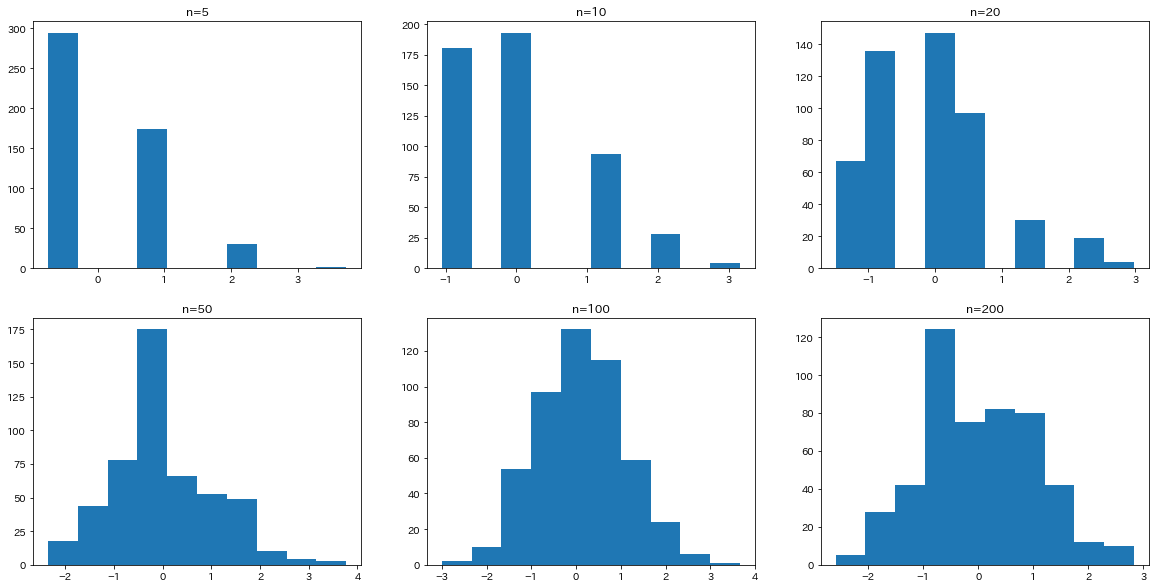

In [4]:
r = 500
p = 0.1

N = [5,10,20,50,100,200]

fig, ax = plt.subplots(2,3, figsize=(20,10))
for i in range(6):
    sample = stats.binom.rvs(N[i], p, size=r)
    sample = (sample - N[i]*p)/np.sqrt(N[i]*p*(1-p))
    ax[i//3][i%3].hist(sample);
    ax[i//3][i%3].set_title('n='+str(N[i]));

次に指数分布$Ex(\lambda)$の場合に実験について説明する。

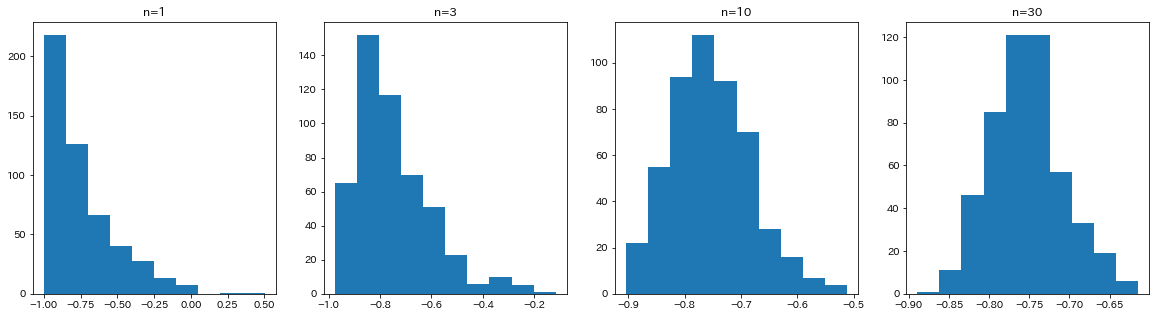

In [5]:
r = 500
beta = 2

N = [1,3,10,30]

fig, ax = plt.subplots(1,4, figsize=(20,5))
for i in range(4):
    sample = np.array([stats.expon.rvs(scale=1 / beta, size=N[i]).mean() for _ in range(r)])
    sample = (sample - (beta))/(beta)
    ax[i].hist(sample);
    ax[i].set_title('n='+str(N[i]));

### 中心極限定理の応用
二項分布$Bi(n,p)$は
$$
f(x)=_nC_xp^x(1-p)^{n-x}
$$
で表される。
中心極限定理によると、$n$が大きいときに$Bi(n,p)$は正規分布に近づくので、それで近似することができる。
$E(S)=np,V(S)=np(1-p)$より、
$$
z=\frac{S-np}{\sqrt{np(1-p)}}
$$
の分布は$n$が大きければ、標準正規分布$N(0,1)$によって近似することができる。
$n$回の試行のうち、成功の回数が$k$回以上$k'$回以下である確率は、$n$が大きければ、標準正規分布の累積分布関数$\Phi$により
$$
\begin{align}
P(k\leq S\leq k')&=P\biggl(\frac{k-np}{\sqrt{np(1-p)}} \leq z \leq \frac{k'-np}{\sqrt{np(1-p)}}\biggr)\\
&=\Phi\biggl(\frac{k'-np}{\sqrt{np(1-p)}} \biggr) - \Phi\biggl(\frac{k-np}{\sqrt{np(1-p)}} \biggr)
\end{align}
$$
で求めることができる。